PostId: 2019-01-23-174024
Title:Maximum entropy modelingから見たMEMM

[サイコロ本で16.2のMaximum entropy modelingという節を読んでいろいろ苦戦して](https://karino2.github.io/2018/12/27/164449.html)、だいたい理解したかなぁ、と思った後に我らがhimkt先生と話をしていると、なんかさっぱり噛み合わない。
話をしていくと、どうも向こうはMEMMという、さらに発展系のモデルの話をしている事に気づく。

そしてさらに、この両者の関係は最近の若者的には重視されてなくて、むしろHMMをどう改善したのか、それでどういう課題が残ってCRFで解決したのか、というのが正しいコンテキストの理解になっている気がした。
だがサイコロ本の段階ではCRFもMEMMも無い代わりに、真面目にMaximum entropy modelingという物を追う事になったので、こういう駆け足でCRFに行こうという人たちとはちょっと違う理解に到達している気がする。
たぶんこの辺をリアルタイムでやってた人からすれば常識なのだろうが、それも18年前との事なので、
現代のブログに書いてみる価値もあるんじゃないか、と思った。

# Maximum entropy modelingとは何か？

上記のサイコロ本のメモでも書いてあるが、いまいち本質がわかりにくいので自分の言葉でまとめてみよう。
なお、これはサイコロ本とはだいぶ違う定式化になっている。

Maximum entropy modelingとは、0-1のバイナリのFeatureの組と0-1のラベルによって表現されるサンプルがたくさんあった時に、このFeatureとラベルの組の「同時分布」を推計する教師なし学習のテクニックである。

ラベルのあるデータなのだが教師無し学習、というのが珍しいが、分布の推計は普通教師なし学習なので、Featureとラベルの同時分布を推計すると思えば教師なし学習というのも自然だ。

だからこのラベルは学習のラベルでは無い（だが学習時にこのラベルの性質を使う）。

以下、同時分布といったらこの「Featureの組」と「ラベル」の同時分布とする。

### Maximum entropy modelingの4つの前提

それには4つの前提が置かれる。

- 前提1. Featureはバイナリの組
- 前提2. ラベルはバイナリ
- 前提3. 各バイナリFeatureのempricalな同時分布による期待値は、真の同時分布による各バイナリFeatureの期待値と一致している
- 前提4. 真の分布は、前提1, 2, 3を満たす範囲で最もエントロピーが大きくなる、という性質を有する

4がこのモデルに特有の仮定となるが、この仮定自体は自然な物と思う。
どちらかというとラベルがバイナリだったりFeatureがバイナリだったり、という方が特殊な問題設定という印象。

### 仮定のご利益1 モデルがlog linearになる

この4つの前提を置くと、EM法とか変分ベイズとかと同じような計算で、真の同時分布が簡単に求まる、というのがこのmaximum entropy modelingのキモとなる。
詳細は以下のPDFに詳しい。[A Simple Introduction to Maximum Entropy Models for Natural Language Processing](https://repository.upenn.edu/cgi/viewcontent.cgi?referer=http://d.hatena.ne.jp/takeda25/20121105/1352385394&httpsredir=1&article=1083&context=ircs_reports)

ポイントだけ挙げておく。
まず前提3をconstraintsとした、エントロピーを最大化する分布を探す、という最適化問題を考える。

真の分布とlog linearなモデルの間のrelative entropyを考えると、それが以下の2つに分解出来る。

1. log linearな分布とlog linearかつ前提3のconstraintsを満たす分布のrelative entropy
2. 真の分布と前提3かつlog linearな分布との間のrelative entropy

この時に、entropy 最大を仮定すると2のrelative entropyがゼロになる、つまり両者の分布が一致するという事が証明出来る。

ようするに、割と一般的に見える前提を置くと、なんと解はlog linearなモデルになる、という素晴らしい結論が得られる。

### 仮定のご利益2。 パラメータの推定で良い近似が使える

前提3を使う為には、提案分布によるFeatureの期待値とempricalなFeatureの期待値を計算する必要がある。
empricalな方は、単なる平均なのでいいとして、提案分布によるfeatureの期待値が、ちょっと辛い。
というのは全入力の組に対する期待値になるから。単語の全入力の組の期待値はだいたい計算不能ですよね。

だが、Featureがバイナリなのとラベルがバイナリである、という前提を置いているので、ラベルをcと書くと以下のように変形出来る。

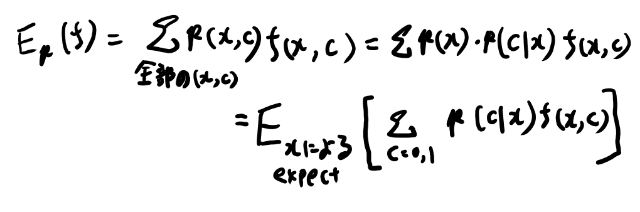

In [1]:
MeatPieImage()

ここで条件付き確率に変形するあたりにCRFへとつながる発見が見えるが、そこは追いとく。

xとcの同時分布による期待値を、xによる期待値とcの和に分解出来た。
ここまでは恒等式なので計算出来ない度合いは変わらないが、ここで、このxによる期待値をサンプル平均に置き換える、という近似を行う。

実際この条件付き期待値ならサンプル平均でもまぁまぁ良い近似になってる事が多いでしょう（データが多ければ）。

そうするとまぁまぁ妥当な近似で提案分布によるFeatureの期待値が計算出来る。
この近似とご利益1から、現実的に使えそうなEM法みたいなアルゴリズムでlog linearモデルのパラメータが推計出来る。

やったね！というのがMaximum entropy modelingという物。

アルゴリズムの詳細は省くがアルゴリズム自体は大した事無い（収束とかを証明するのは大した事だが）

# MEMMとは何か

MEMMはMaximum entoroy markov modelの略だと思う。
[Wikipediaが良くまとまっている](https://en.m.wikipedia.org/wiki/Maximum-entropy_Markov_model)。
また、こちらの論文がちゃんと書いてある。[Maximum Entropy Markov Models for Information Extraction and Segmentation](http://www.ai.mit.edu/courses/6.891-nlp/READINGS/maxent.pdf)

MEMMはHMMの改善である。
HMMが観測の系列がlatentな系列から生成されたとみなして、観測からlatentな系列を推計するのに対し、
MEMMは逆に観測の系列からlatentな系列を推計するclassifierの問題とする。

ただし基本的にはlatentな系列はmarkov assumputionを満たしていて、
遷移の確率がこの観測系列の条件付き確率で表される、とみなす。

なお、このポストではMEMMの事はみんなある程度知っているがMEモデリングはあまり知らない、という前提で書く。
だからMEMMがHMMと比べてどう良いのか、みたいなのは他をあたってください。

### ME modelingが使えるようにする為の仮定

この問題設定で、さらに先程のME modelingの前提を使えるように制約を課す

1. 現在のlatent stateと観測を入力としてバイナリFeatureを返すような関数を幾つか考える。これだけをFeatureとする
2. ラベルデータとしては、latentな状態を次元として次の状態を1、それ以外の状態を0とするような物を考える

こうするとラベルはlatent space次元となるが、これをそれぞれの次元ごとに別々の確率モデルと考えると、個々のモデルはバイナリラベルとして考えられる。
これでラベルもFeatureもバイナリとなったので、同時分布はMEMMのモデルと同じ形になる。
後は比較的自然な前提3, 4を置けば同じ手法で推計が出来る。やったね！

### latentなラベルを識別器で求めてるの？

さて、HMMと比べると、MEMMはlatentなラベルの遷移確率を直接推計する、という所が大きな違いとなっている。
HMMが生成モデルで観測が得られたとしてその尤度を最大化する、というもってまわったような問題設定になってしまっているのに対し、MEMMはもっと直接的だからこっちの方が良さそう。

この遷移確率は、観測と前のステートをgivenとした条件付き確率として捉えるのが自然だろう。

一方でME modeling自体は、次のstateとFeatureの組の分布を推計する手法だ。
条件付き確率を計算する手法では無い。
この手法を使って同時確率を推計し、その後に入力や前のlatent stateを入れる事で遷移確率としている。
推計しているのは同時確率であって条件付き確率では無い。

だが、上記のMEMMの論文でも、式(4)で最初から条件付き確率として遷移確率を表現していて、同時確率は出てきていない。

これはベイズルールを適用すれば全く同じ事になるから正しい記述ではあるけれど、ME modelingをちゃんと知っていてそれをもとに考えようとする人にとっては一段わかりにくい記述になっている。
この辺が、話がなんか噛み合わないなぁ、となっていた原因じゃないか。

### ME modelingを知らなくても使えるMEMM

MEMM自体はME modelingを理解していなくても、たぶん使う事は出来る。
だからそういう記述が世の中には広まったのだろう。

具体的には最初からlog linearな関数形を仮定している、として、Featureはバイナリとする、と言ってしまえば良い。

これは本来はME modelingの前提をおいて最適化して導出される結果なのだが、別に使うだけなら、そんな「より一般的な前提だけで同じ結果が導き出せる」という事を知っている必要は無い。

系列ラベリングという観点からすればこのlatentな遷移確率を直接条件付き確率として求める、という所に発明があるのであって、ME modelingはその解が求まる形の制約の一つに過ぎないし、同時確率は一切使わないので最初から条件付き確率を推計している、と思っても結果は何も変わらない。
さらにどうせCRFですから、という人たちにとってはHMMやCRFとの違いが大切なのであって、ME modelingによる美しい応用という観点はあまり重要では無いかもしれない。

# まとめ

MEMMはME modelingの一インスタンスとなっているので、MEMMは厳密にME modelingと言える。
だが、MEMMの偉い発明はそこじゃないので、言葉はみんな使ってるけど、実際どこらへんがMEなのかはみんな気にしない。
どうせCRFなのでそれで良い。

なお以上はMEMMとか全然知らない素人が半日くらいで至った理解なので、結構間違いもあるかもしれません。
詳しい人の見解など聞きたい。